# Shopify Challenge:
## Question1: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#import data; saved as csv 
data=pd.read_csv("Challenge_Dataset.csv")
data.info()
#adding new column for item price per order_id
data["item_price"]=data["order_amount"]/data["total_items"]
print("\nThis dataset dimesnion is {}".format(data.shape))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB

This dataset dimesnion is (5000, 8)


**The dataset seems to be clean with no null values; its shape is 5000 rows x 8 columns**

In [3]:
data.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at', 'item_price'],
      dtype='object')

In [4]:
#stat summary of dataset 
data.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


**Standard debviation of order amount is too high (41282.54) where max is way larger than min value with a mean of (3145.12) , which indicates existance of outliers, which might be the reason for inflating AOV. Yet, more analysis to be done**

**Similarly, item_price seems to have outliers with high Std (2441.96). where the 50% percentile (median) of data seems to be reasonable with order_amount = 284 and item_price = 153**

## Q1:Exploratory Analysis -- Visualize outliers



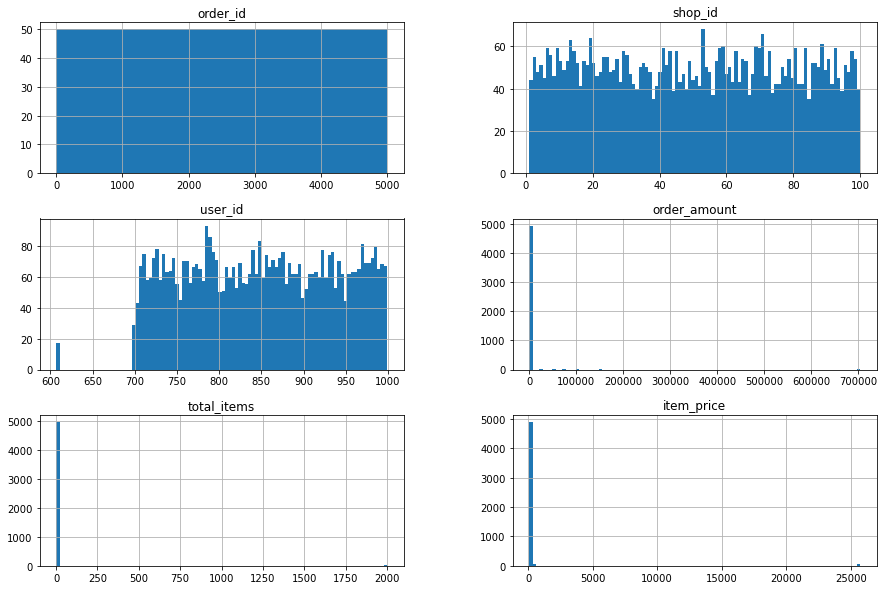

In [5]:
#Check distribution of dataset
data.hist(bins=100,figsize=(15,10))
plt.show()

In [6]:
#Assess normality of data using Shapiro test: Null hypothesis is that the data was drawn from normal distribution
st.shapiro(data.order_amount)

ShapiroResult(statistic=0.04213523864746094, pvalue=0.0)

**It is clear that there are outliers in order_amount, total_items and as a result in item_price as well**

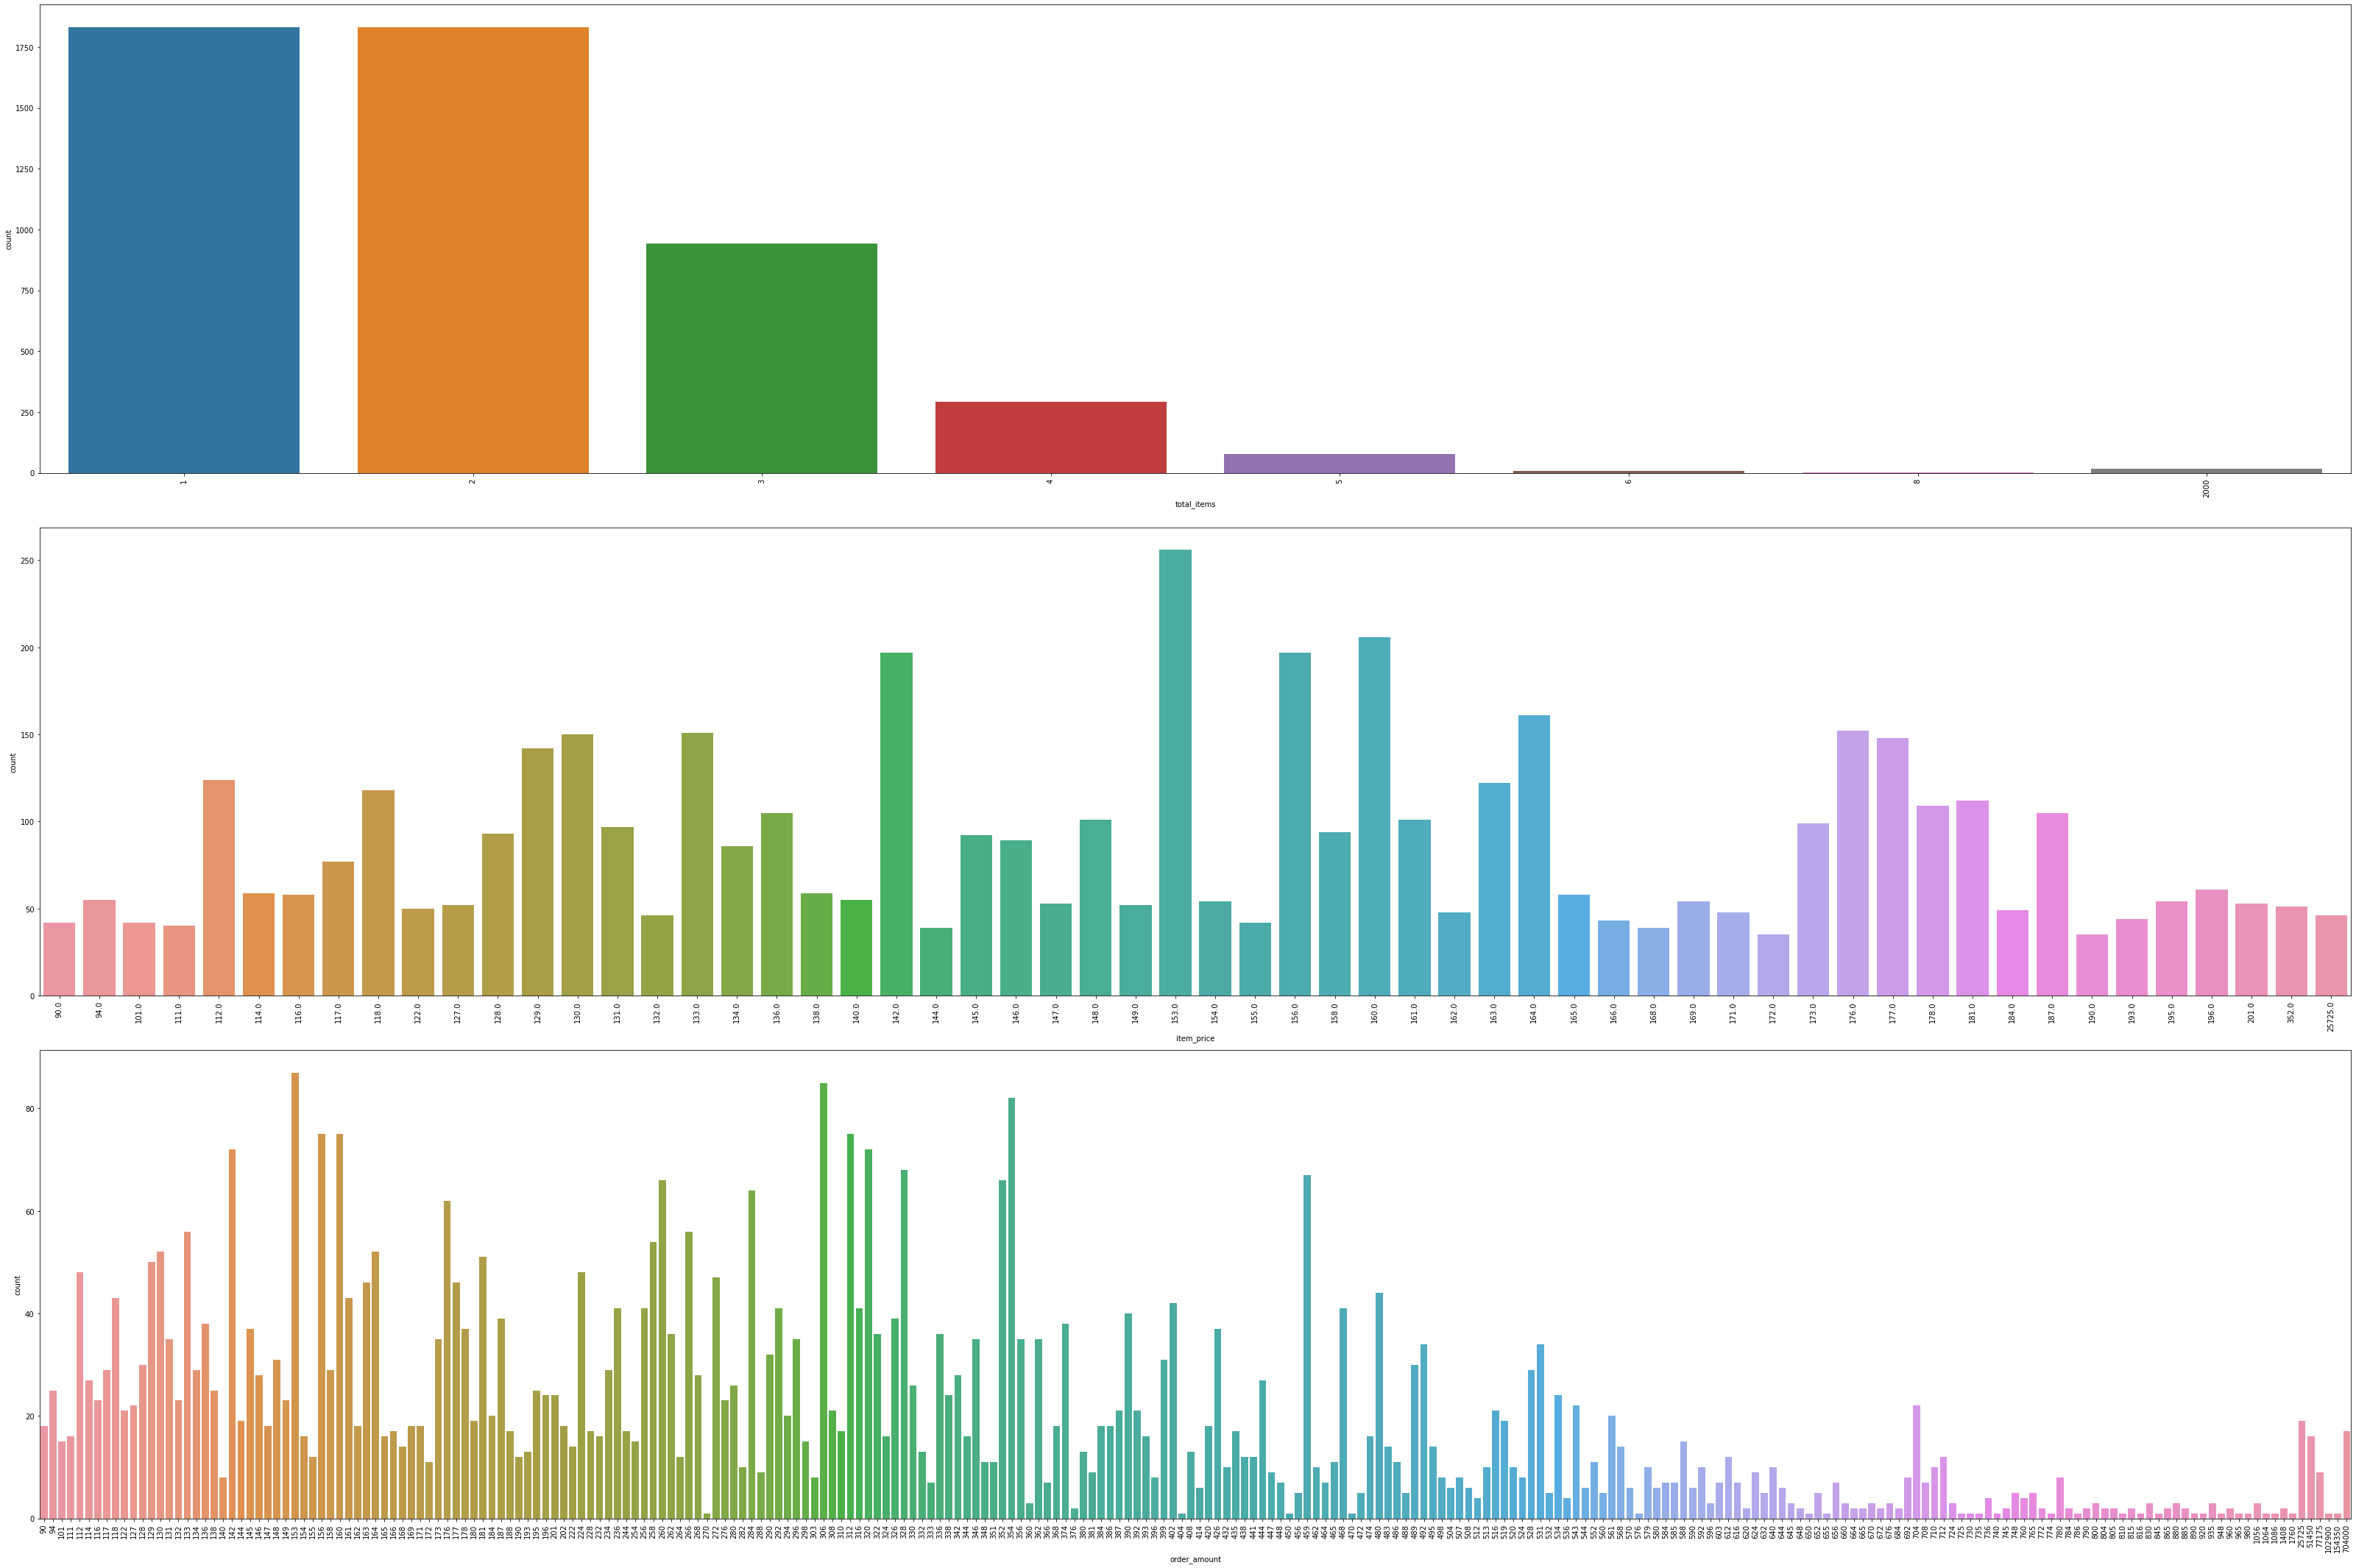

In [7]:
Group=["total_items","item_price","order_amount"]
fig, ax = plt.subplots(figsize = (45,30))
for subplot_index, column_name in list(enumerate(Group)):
    fig.add_subplot(3,1, subplot_index+1)
    sns.countplot(x=data[column_name])
    plt.xticks(rotation=90)



plt.tight_layout()
ax.axis('off')
plt.show()


### Distribution shape for order amount uaing kernel density estimation (violin plot); wider sections of plot represnt a higher probability of a given value and vice versa.

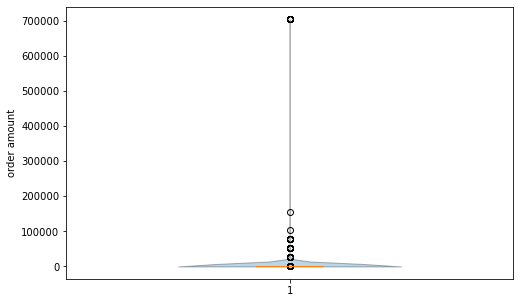

In [8]:
plt.figure(figsize=(8,5))
vln=plt.violinplot(data.order_amount,showmeans=False, showmedians=False,
        showextrema=False)
plt.ylabel("order amount")
plt.boxplot(data.order_amount)
#plt.ylim(0,40000)
vln["bodies"][0].set_edgecolor('black')
plt.show()

In [9]:
# Computing the threshold for outlier removal using Interquartile Range Method
iqr = st.iqr(data["order_amount"])
thresh = iqr*3 + np.percentile(data["order_amount"],75)
print(thresh)
data_clean=data[data["order_amount"]<thresh]

1071.0


Text(0, 0.5, 'order amount')

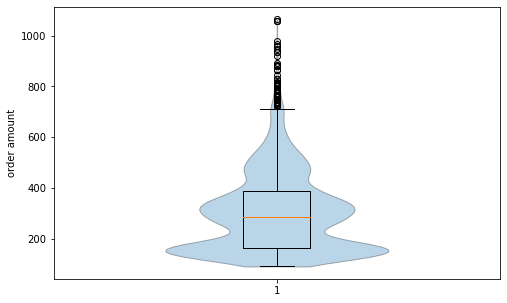

In [10]:
plt.figure(figsize=(8,5))
vln=plt.violinplot(data_clean.order_amount,showmeans=False, showmedians=False,
        showextrema=False)
plt.boxplot(data_clean.order_amount)
vln["bodies"][0].set_edgecolor('black')
plt.ylabel("order amount")
#vln["bodies"][0].set_alpha(1)


In [11]:
data_clean.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000
mean,2500.008311,49.852625,849.739915,301.678086,1.992499,151.660855
std,1444.324671,29.072106,86.861207,157.568220,0.979796,28.619882
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1247.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2498.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3752.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1064.000000,8.000000,352.000000


**There is 67 (1.34% of whole dataset) orders were removed when applying threshold for order_amount**

In [12]:
#check which shop drive outliers, skeweness of data 
print("there is {} of shops in dataset\n".format(data.shop_id.nunique()))
print("Ids of shops that has orders driving the skewness of data are: {}".format(data[data.shop_id-data_clean.shop_id!=0].shop_id.unique()))



there is 100 of shops in dataset

Ids of shops that has orders driving the skewness of data are: [42 78 43]


In [13]:
#print out max and count of removed order per shop id 
data[data.order_amount>thresh].groupby("shop_id").agg(["max","count"])[["order_amount","item_price","total_items"]]

order_amount       item_price       total_items      
                 max count        max count         max count
shop_id                                                      
42            704000    20      352.0    20        2000    20
43              1086     1      181.0     1           6     1
78            154350    46    25725.0    46           6    46

## Q1 Conclusion:
   ### 1- Outliers was detected with exploratory analysis by looking at distribution and summary statistics of dataset; they drive the inflation found in AOV 

   ### 2- Interquartile Range Method was used as metric to remove outliers and reassess average value for order amount
   #### ---- The reason for choosing this method because it supports the non-Gaussian distribution nature of our data
   #### ---- The normality was quantatively assessed by using shapiro test and qualitatively by histograma nd violin plots
   #### ---- Threshold was calculated based on Q3+3*(Q3-Q1) where Q3,Q1 are 75th and 25th percentile respectively
   ### ---- Result: 
   #### -----------> Threshold =1071
   #### -----------> : Order amount Mean and median after thresholding are 301.67 and 284; AOV new value is 284
   #### -----------> : Median serves here a better metric since distribution is still skewed even after thresholding
   #### -----------> : Shops that contribute to outliers are 42,43,78; number of orders above threshold for each shop are 20,1,46 respectively.  

## Q2: Please go back to repo "Shopify_challenge"  and Check Q2_SQL.docx 

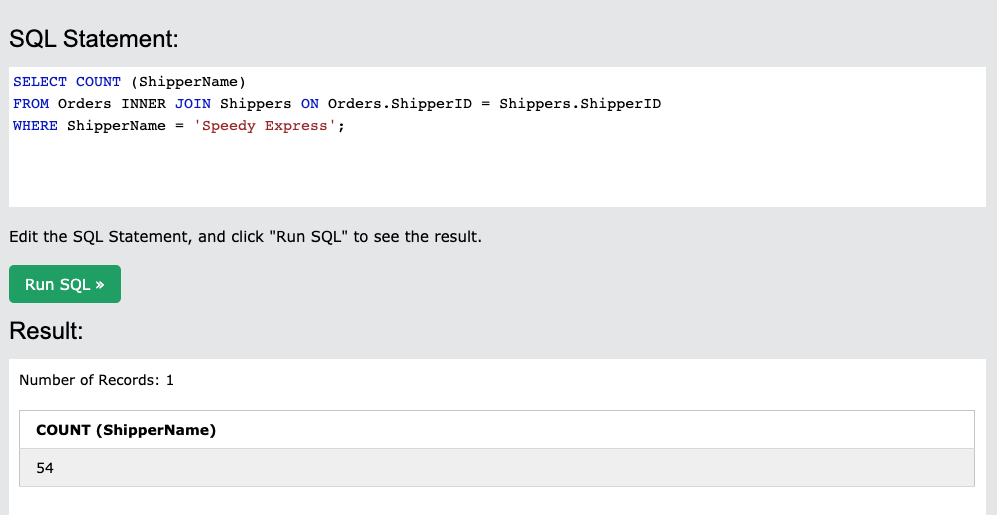

In [16]:
from IPython.display import Image
Image("Q1.png")

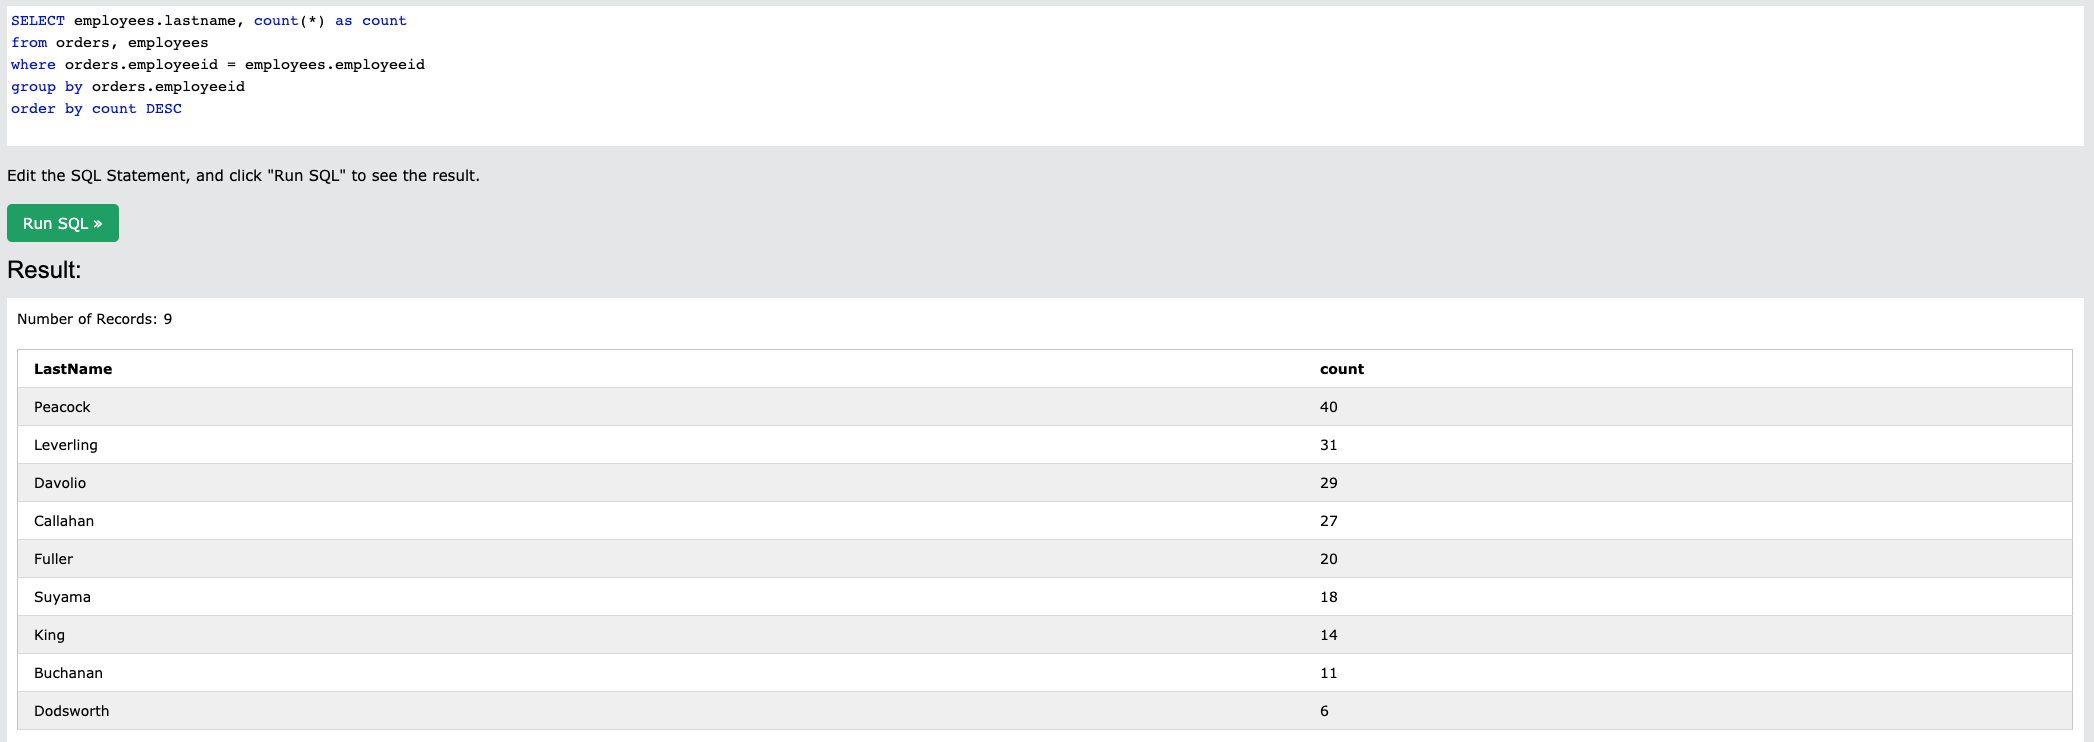

In [17]:
Image("Q2.png")

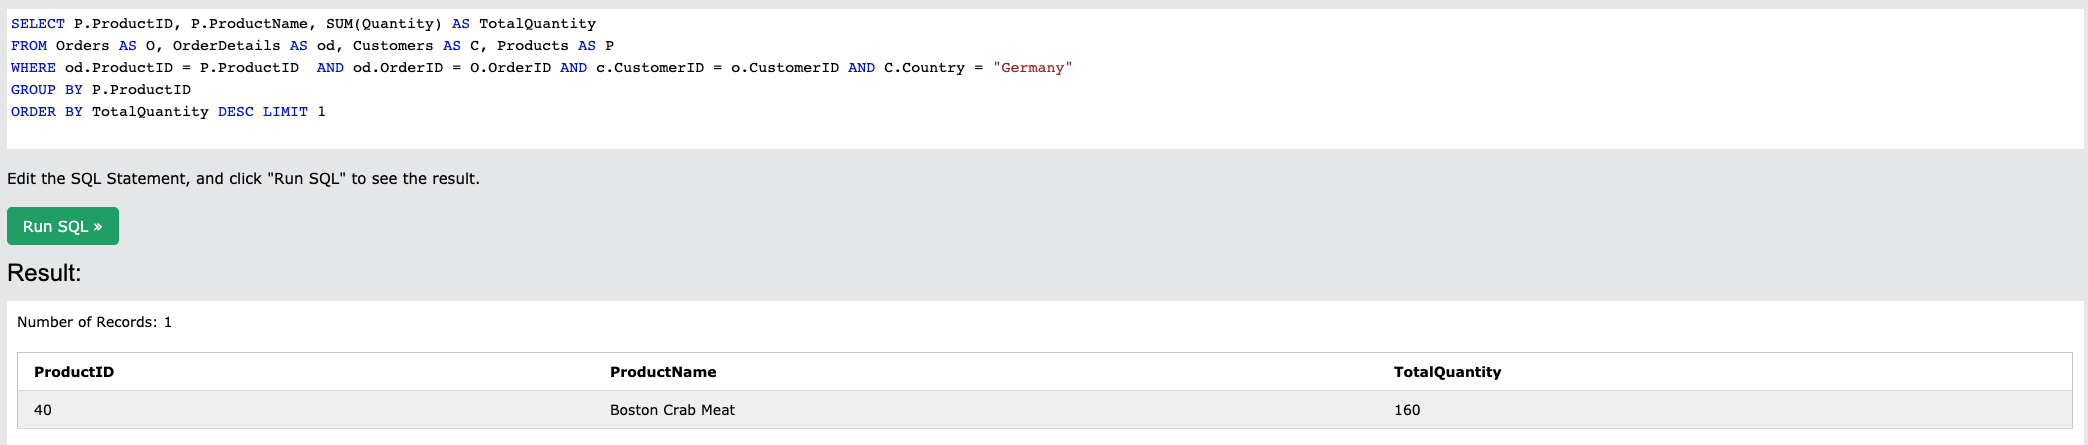

In [18]:
Image("Q3.png")